In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [3]:
data = pd.read_csv("data_california_house.csv")
df = pd.DataFrame(data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

C:\Users\fbkby\AppData\Local\Temp\ipykernel_25704\1590527289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,537.281561,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,421.683154,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.ocean_proximity.unique()

array(['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
label_encoder = LabelEncoder()
df['ocean_proximity_label'] = label_encoder.fit_transform(df['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_label
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,1
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,1


In [11]:
df = df.drop('ocean_proximity', axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_label
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0,1
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0,3
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0,0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0,0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0,1


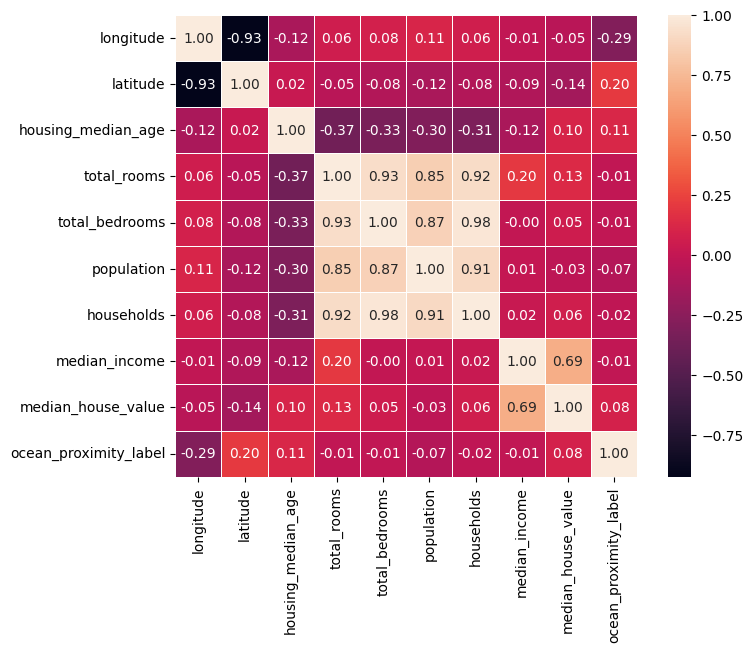

In [12]:
corr = df.corr()
plt.figure(figsize=(8,6))
pltheatmap =sns.heatmap(corr , annot=True, fmt='.2f', square=True, linewidths=.5)

<Axes: >

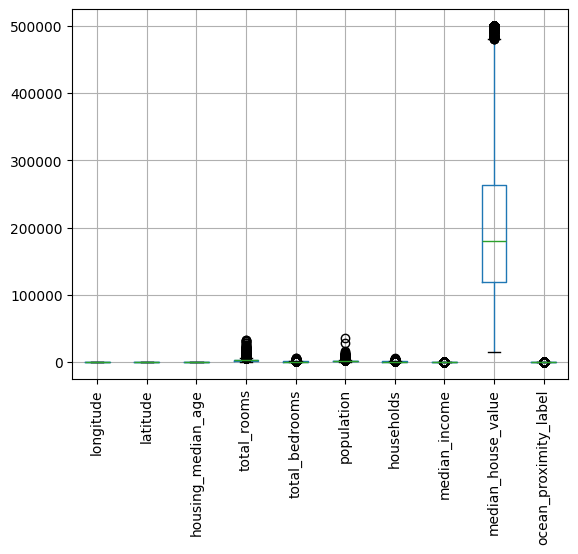

In [13]:
df.boxplot(rot=90)

In [14]:
dfCopy = df.copy()

In [15]:
def Outlier(num):
    q1 = num.quantile(0.25)
    q3 = num.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print("IQR:",iqr)
    LimitBawah = q1 - limit
    LimitAtas = q3 + limit
    print("Limit bawah: ",LimitBawah)
    print("Limit atas:",LimitAtas)  

In [16]:
Outlier(df['median_house_value'])

IQR: 144300.0
Limit bawah:  -96850.0
Limit atas: 480350.0


In [17]:
df[df['median_house_value'] > 480350].count()['median_house_value']

np.int64(757)

Text(0.5, 0, 'Sesudah')

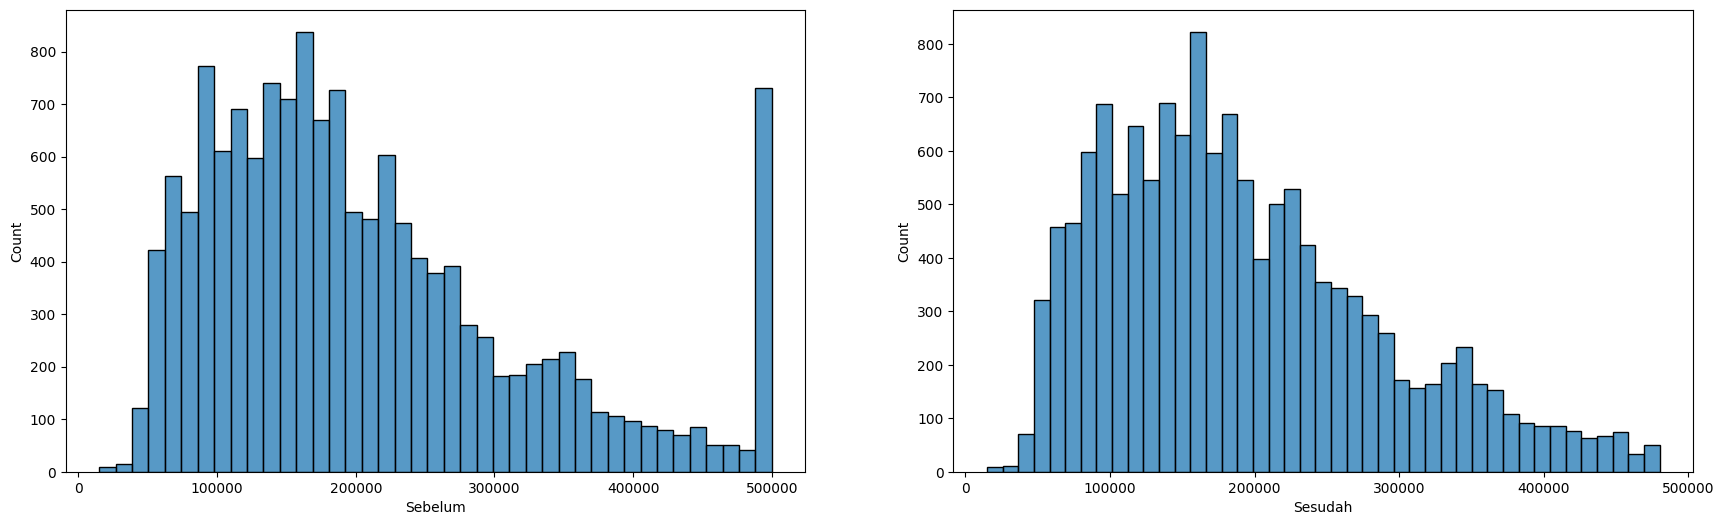

In [18]:
df = df[df['median_house_value'] <= 480350]
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.histplot(dfCopy['median_house_value'], ax=axes[0])
sns.histplot(df['median_house_value'], ax=axes[1])
axes[0].set_xlabel('Sebelum')
axes[1].set_xlabel('Sesudah')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13691 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   longitude              13691 non-null  float64
 1   latitude               13691 non-null  float64
 2   housing_median_age     13691 non-null  float64
 3   total_rooms            13691 non-null  float64
 4   total_bedrooms         13691 non-null  float64
 5   population             13691 non-null  float64
 6   households             13691 non-null  float64
 7   median_income          13691 non-null  float64
 8   median_house_value     13691 non-null  float64
 9   ocean_proximity_label  13691 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.1 MB


In [20]:
Outlier(df['total_rooms'])

IQR: 1684.0
Limit bawah:  -1087.0
Limit atas: 5649.0


In [21]:
df[df['total_rooms'] > 5649].count()['total_rooms']

np.int64(858)

Text(0.5, 0, 'Sesudah')

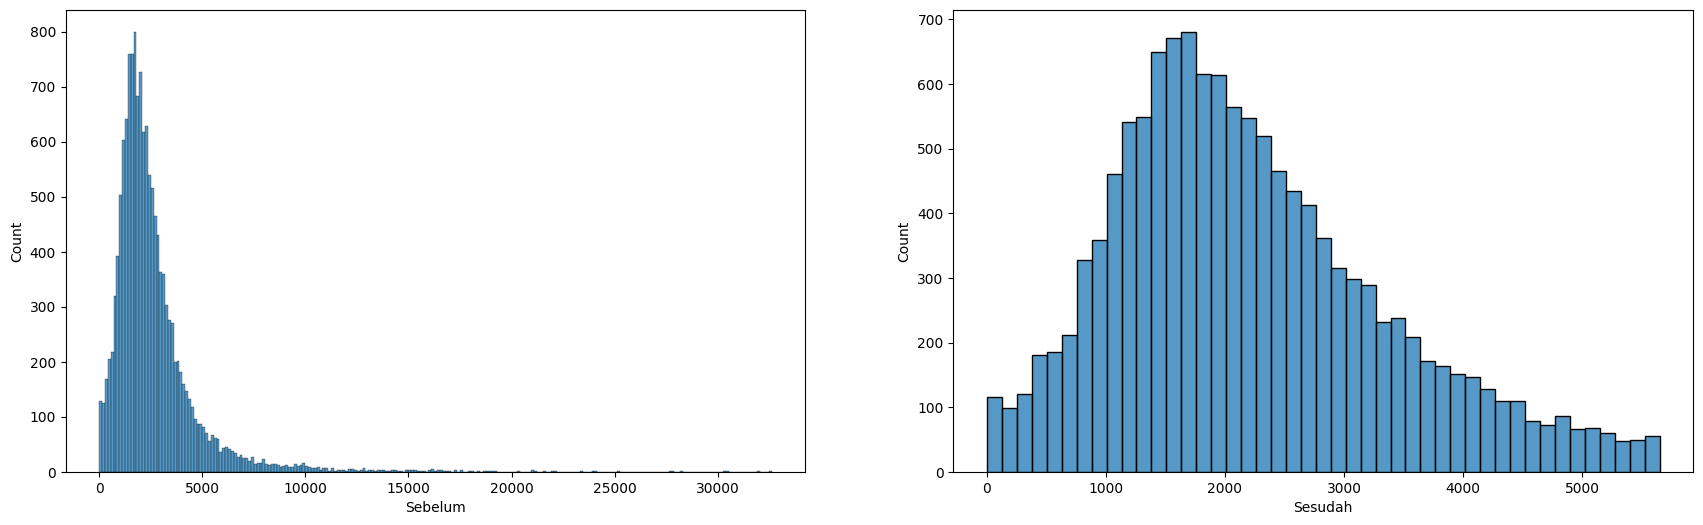

In [22]:
df = df[df['total_rooms'] <= 5649]
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.histplot(dfCopy['total_rooms'], ax=axes[0])
sns.histplot(df['total_rooms'], ax=axes[1])
axes[0].set_xlabel('Sebelum')
axes[1].set_xlabel('Sesudah')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12833 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   longitude              12833 non-null  float64
 1   latitude               12833 non-null  float64
 2   housing_median_age     12833 non-null  float64
 3   total_rooms            12833 non-null  float64
 4   total_bedrooms         12833 non-null  float64
 5   population             12833 non-null  float64
 6   households             12833 non-null  float64
 7   median_income          12833 non-null  float64
 8   median_house_value     12833 non-null  float64
 9   ocean_proximity_label  12833 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.1 MB


In [24]:
Outlier(df['total_bedrooms'])

IQR: 306.0
Limit bawah:  -170.0
Limit atas: 1054.0


In [25]:
df[df['total_bedrooms'] > 1054].count()['total_bedrooms']

np.int64(325)

Text(0.5, 0, 'Sesudah')

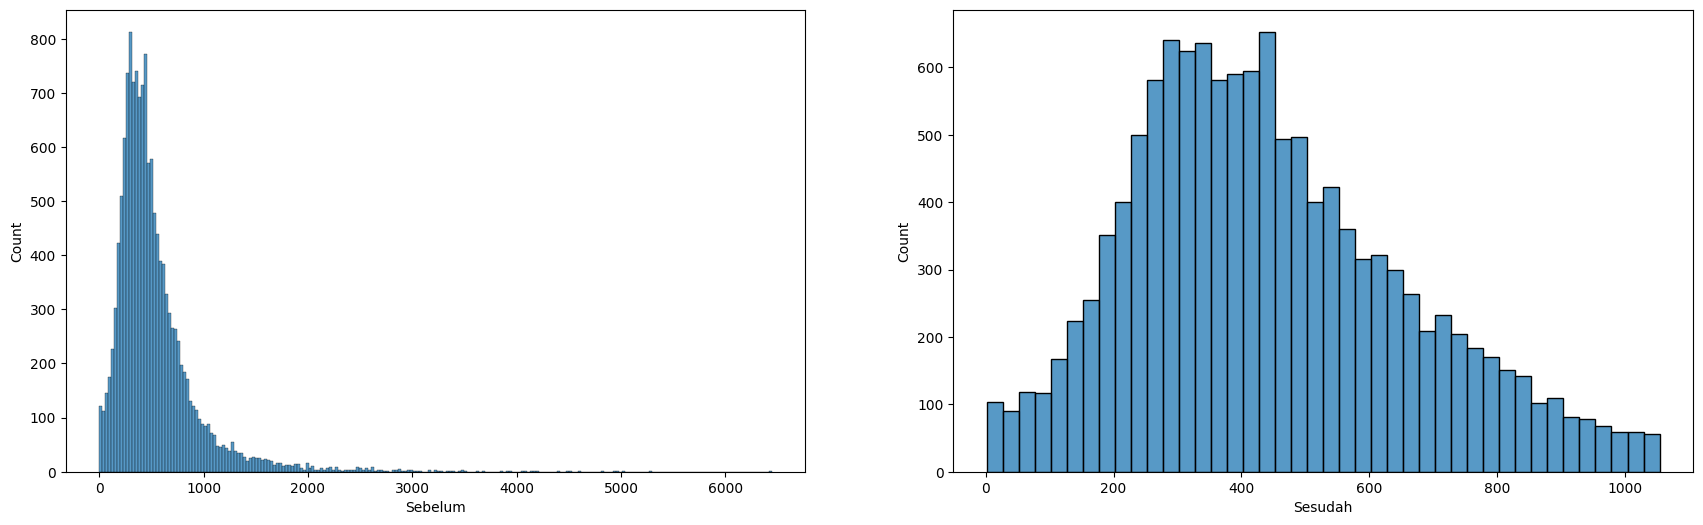

In [26]:
df = df[df['total_bedrooms'] <= 1054]
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.histplot(dfCopy['total_bedrooms'], ax=axes[0])
sns.histplot(df['total_bedrooms'], ax=axes[1])
axes[0].set_xlabel('Sebelum')
axes[1].set_xlabel('Sesudah')

In [27]:
Outlier(df['population'])

IQR: 797.25
Limit bawah:  -428.875
Limit atas: 2760.125


In [28]:
df[df['population'] > 2760.125].count()['population']

np.int64(319)

Text(0.5, 0, 'Sesudah')

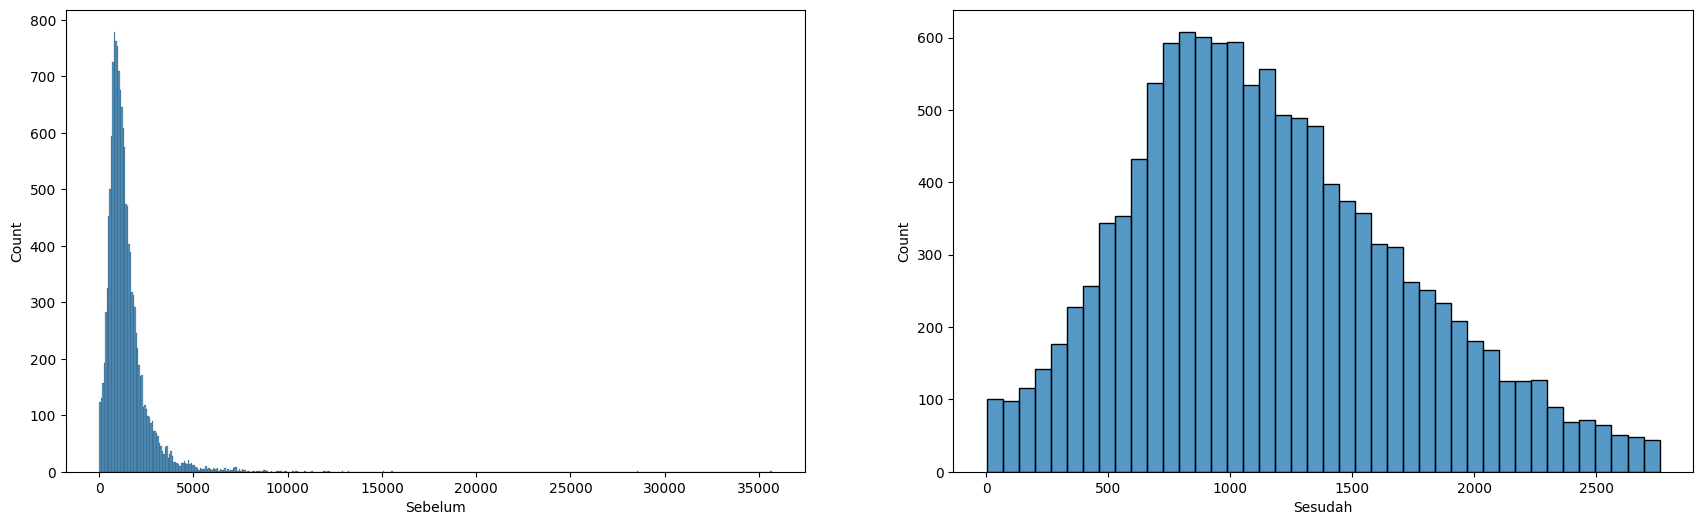

In [29]:
df = df[df['population'] <= 2760.125]
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.histplot(dfCopy['population'], ax=axes[0])
sns.histplot(df['population'], ax=axes[1])
axes[0].set_xlabel('Sebelum')
axes[1].set_xlabel('Sesudah')

In [30]:
Outlier(df['households'])

IQR: 261.0
Limit bawah:  -124.5
Limit atas: 919.5


In [31]:
df[df['households'] > 919.5].count()['households']

np.int64(102)

Text(0.5, 0, 'Sesudah')

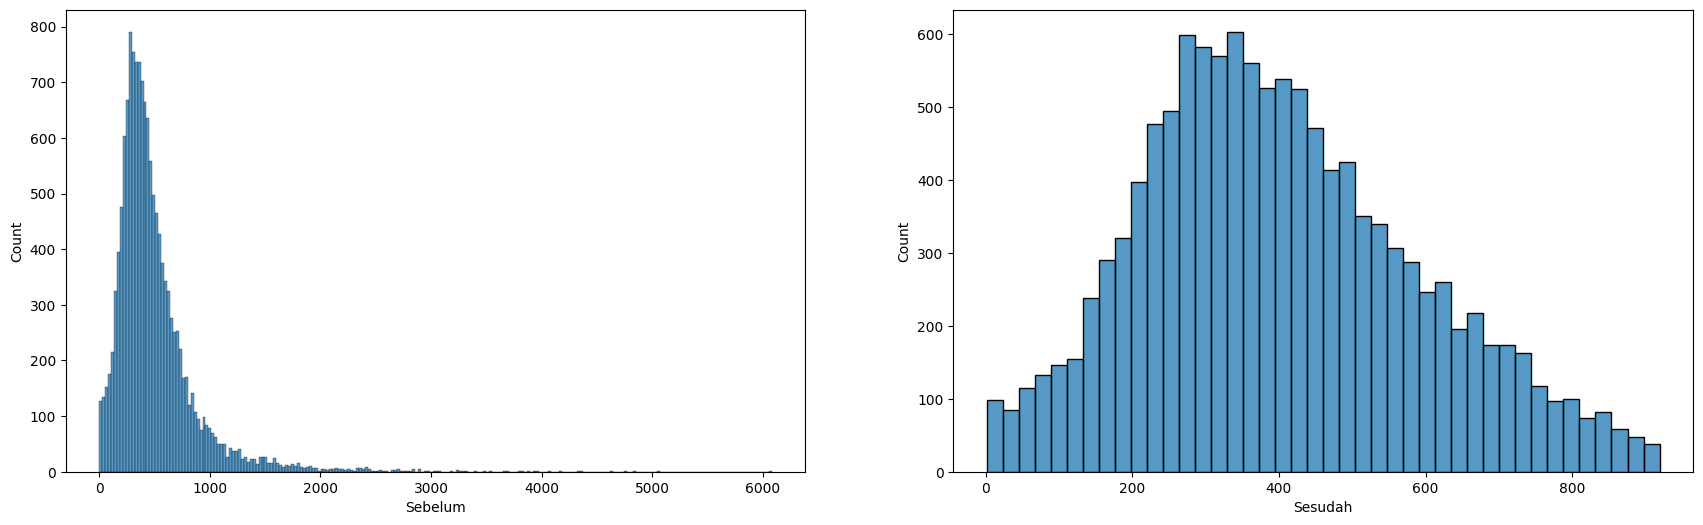

In [32]:
df = df[df['households'] <= 919.5]
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.histplot(dfCopy['households'], ax=axes[0])
sns.histplot(df['households'], ax=axes[1])
axes[0].set_xlabel('Sebelum')
axes[1].set_xlabel('Sesudah')

In [33]:
Outlier(df['median_income'])

IQR: 2.0378499999999997
Limit bawah:  -0.5567749999999996
Limit atas: 7.594624999999999


In [34]:
df[df['median_income'] > 7.594624999999999].count()['median_income']

np.int64(212)

Text(0.5, 0, 'Sesudah')

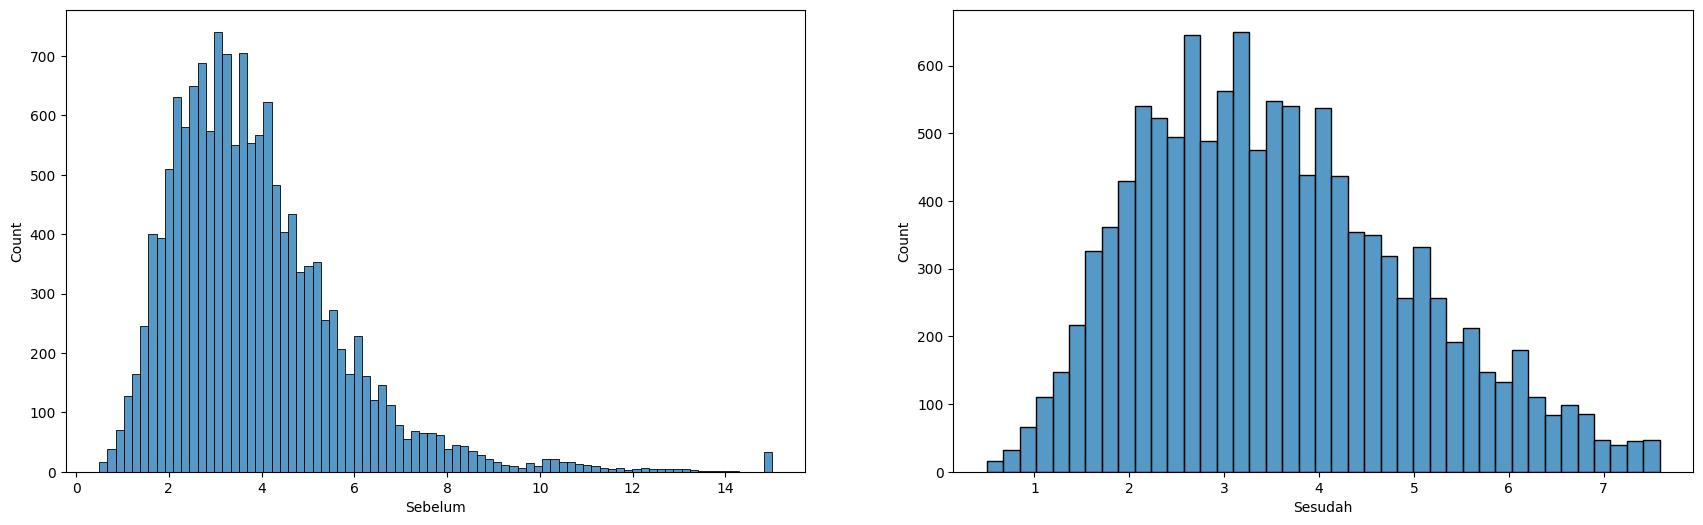

In [35]:
df = df[df['median_income'] <= 7.594624999999999]
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.histplot(dfCopy['median_income'], ax=axes[0])
sns.histplot(df['median_income'], ax=axes[1])
axes[0].set_xlabel('Sebelum')
axes[1].set_xlabel('Sesudah')

In [36]:
Outlier(df['housing_median_age'])

IQR: 18.0
Limit bawah:  -7.0
Limit atas: 65.0


In [37]:
df[df['housing_median_age'] > 65].count()['housing_median_age']


np.int64(0)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11875 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   longitude              11875 non-null  float64
 1   latitude               11875 non-null  float64
 2   housing_median_age     11875 non-null  float64
 3   total_rooms            11875 non-null  float64
 4   total_bedrooms         11875 non-null  float64
 5   population             11875 non-null  float64
 6   households             11875 non-null  float64
 7   median_income          11875 non-null  float64
 8   median_house_value     11875 non-null  float64
 9   ocean_proximity_label  11875 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1020.5 KB


## MODELING

In [39]:
x = df.drop(columns=['median_house_value'])  
y = df['median_house_value']  
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

## random forest

In [40]:
RanFor = RandomForestRegressor(n_estimators=50, random_state=42)
RanFor.fit(X_train, y_train)
y_pred = RanFor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(46237.84205994055)

## Linear Regression

In [41]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)
linreg_predictions = linReg.predict(X_test)
linRegRMSE = np.sqrt(mean_squared_error(y_test,linreg_predictions))
linRegRMSE

np.float64(57091.3280317445)

## XGBoost

In [42]:
XGBoost = XGBRegressor(objective='reg:squarederror',n_estimators=100)
XGBoost.fit(X_train,y_train)
XGBoost_pred = XGBoost.predict(X_test)
XGBoostRMSE = np.sqrt(mean_squared_error(y_test,XGBoost_pred))
XGBoostRMSE

np.float64(43294.358380867685)

## XGBoost Tuning

In [43]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=1)

In [44]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
best_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Root Mean Squared Error on test set:", rmse)
print("Mean Absolute Percentage Error:",mape)

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Root Mean Squared Error on test set: 41611.92437525214
Mean Absolute Percentage Error: 0.16809044875697648


In [45]:
print("Perbandingan Sebelum tuning:",XGBoostRMSE)
print("Setelah Tuning:", rmse)

Perbandingan Sebelum tuning: 43294.358380867685
Setelah Tuning: 41611.92437525214


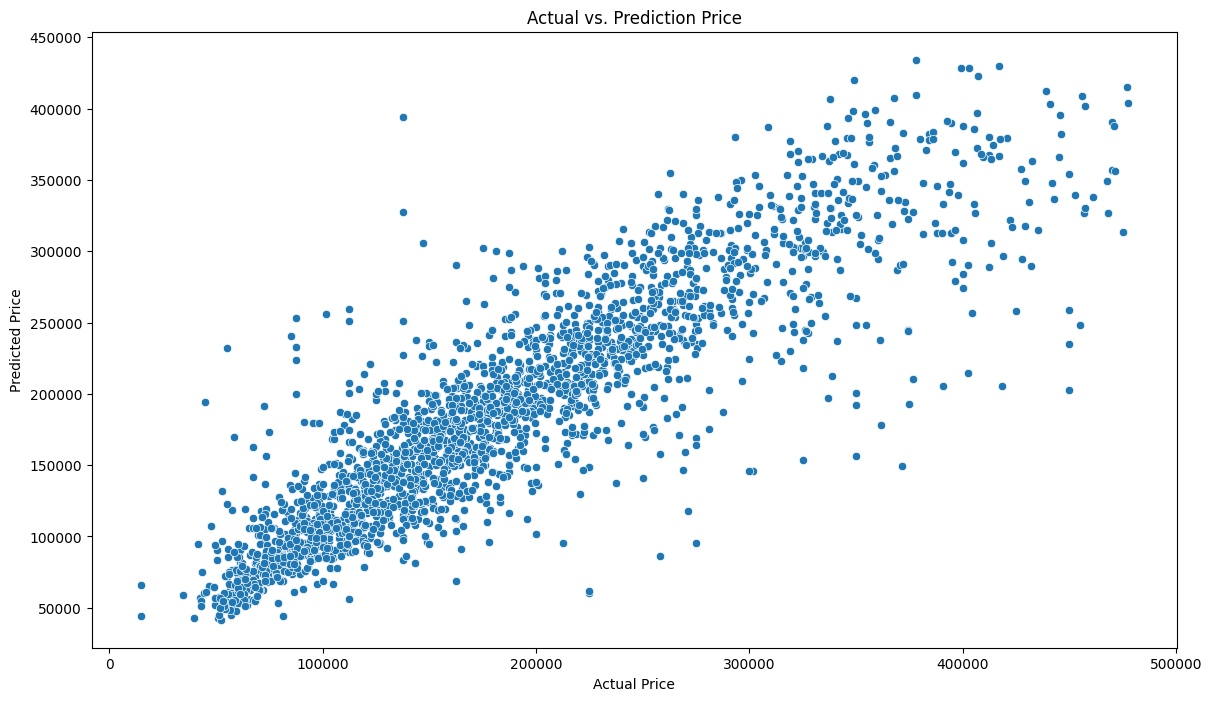

In [46]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');